In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")
aisles=pd.read_csv("aisles.csv")
depart=pd.read_csv("departments.csv")
prior_order=pd.read_csv("order_products__prior.csv")
train_order=pd.read_csv("order_products__train.csv")



# orders
it gives a list of all orders
order no gives the numbers of orders purchased by one user in a given day of week and hours of day per user id


In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


#order_products_train
it gives us information about which products were ordered.it also contain information of the order in which the products were put into the cart

In [15]:
train_order.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302.0,1.0,1.0
1,1,11109.0,2.0,1.0
2,1,10246.0,3.0,0.0
3,1,49683.0,4.0,0.0
4,1,43633.0,5.0,1.0


#products
contains the name of the products with product id,aisles id,and department id

In [16]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


#order_product_prior:
it is structurally similar to order products train

In [17]:
prior_order.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


#aisles
it contains information about all the aisles

In [18]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


#departments
it contains information about every departments

In [19]:
depart.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


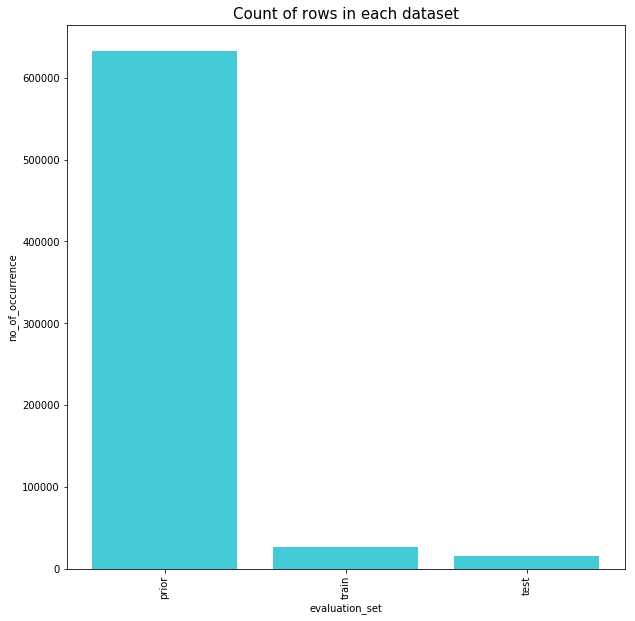

In [32]:
cnt=orders.eval_set.value_counts()
plt.figure(figsize=(10,10))
plt.bar(cnt.index,cnt.values,alpha=0.8,color=color[9])
plt.xlabel("evaluation_set")
plt.ylabel("no_of_occurrence")
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

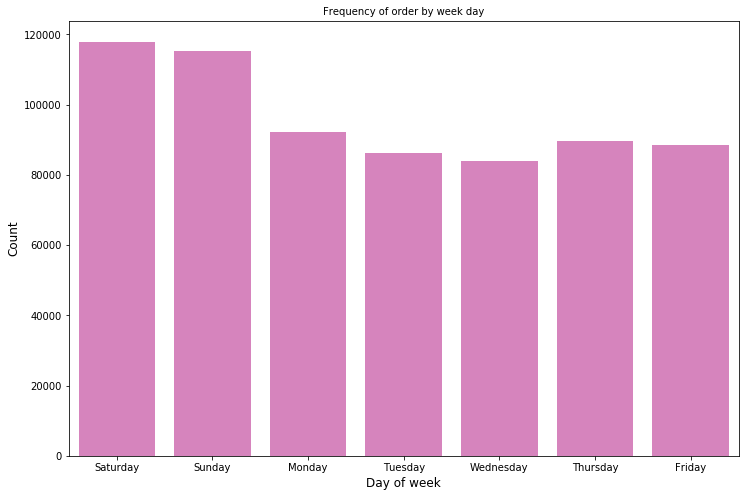

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[6])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(np.arange(7),('Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'))
plt.title("Frequency of order by week day", fontsize=10)
plt.show()

## this plot shows  that people  purchase more orders on weekends than weekdays. We can see that the minimum number of purchases happen on wednesday (mid of the week).

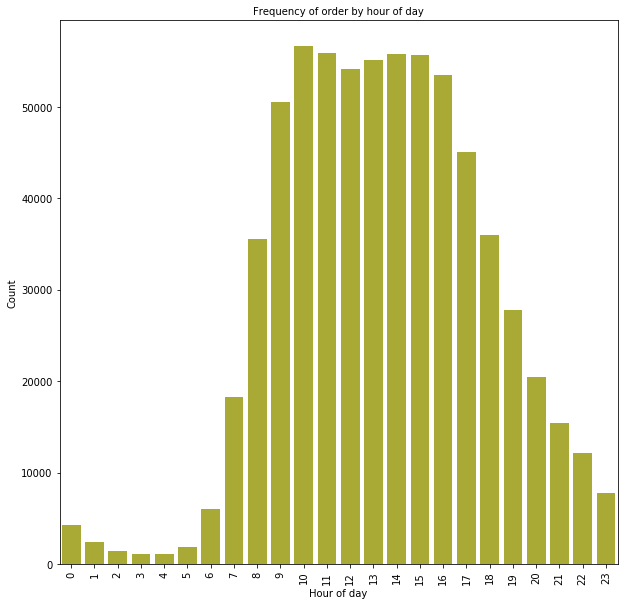

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x="order_hour_of_day", data=orders, color=color[8])
plt.ylabel('Count', fontsize=10)
plt.xlabel('Hour of day', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=10)
plt.show()


In [82]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


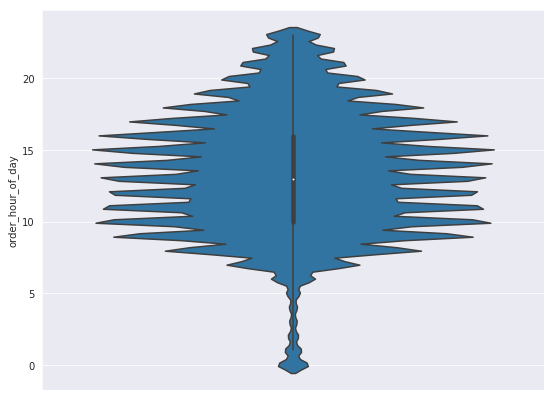

In [85]:
#orders[order_hour_of_day]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,7))
sns.violinplot(ax=ax,y=orders["order_hour_of_day"])

## This plot shows that people tend to purchase orders between 9 AM to 4 PM

In [53]:
# merging datasets
order_products_prior_df = pd.merge(prior_order, products, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, depart, on='department_id', how='left')
order_products_prior_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry


In [73]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry


In [52]:
#getting frequency of counts
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs.head()


,product_name,frequency_count
0,Banana,17934
1,Bag of Organic Bananas,14516
2,Organic Strawberries,9967
3,Organic Baby Spinach,9147
4,Organic Hass Avocado,8042


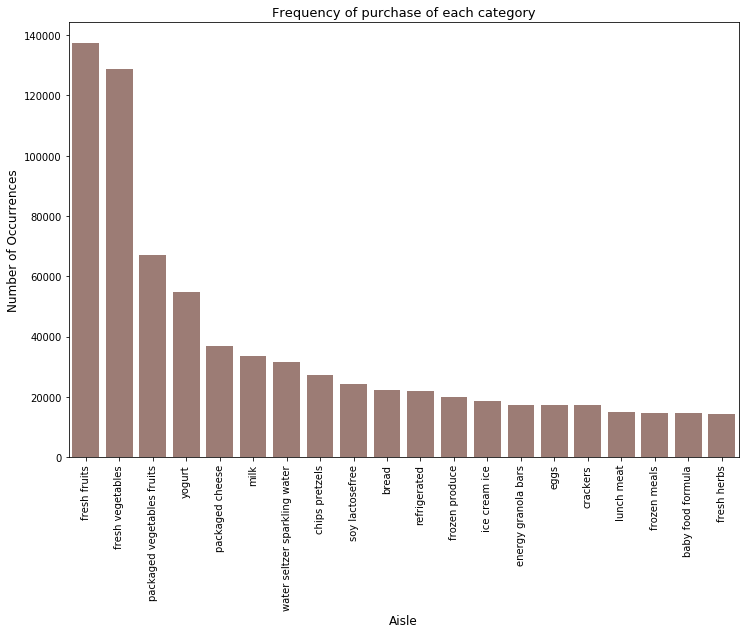

In [72]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of purchase of each category", fontsize=13)
plt.show()

## most of the products purchased are  stable food items that we eat everyday,least purchased items are frozen meals ,baby-food,herbs. 

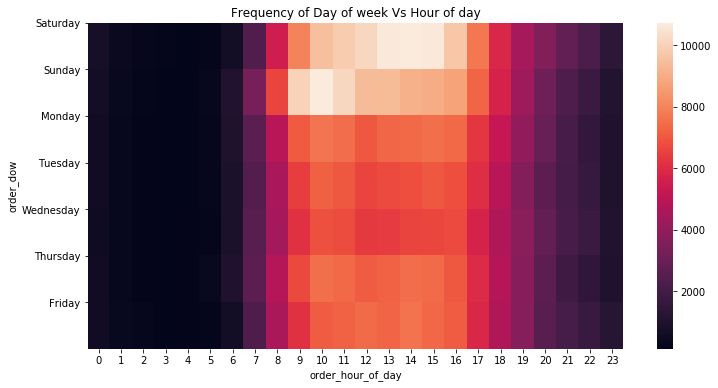

In [57]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.yticks(np.arange(7),('Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'),rotation="horizontal")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

## this  heatmap tells us that most things are purchased on weekends(saturday and sunday) during 10 am to 4 pm time slot.

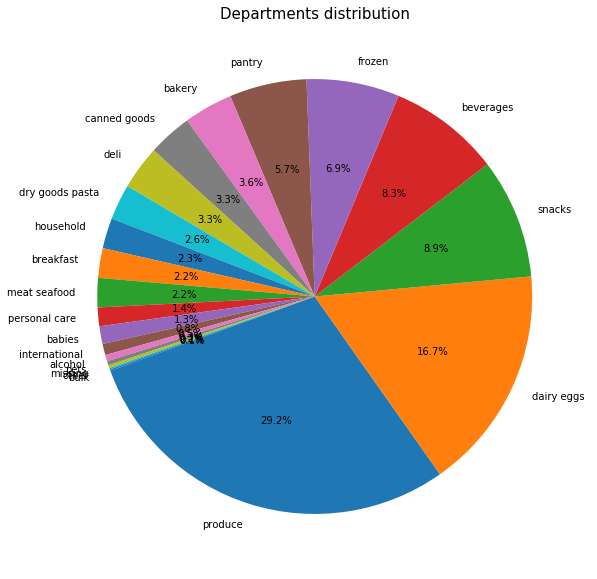

In [69]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

## From the pie chart we can interpret that the most bought products are from produce department, this can be validated from the prior histogram of Frequency of purchase of each category histogram which shows that fresh fruits and vegetables are the most purchased items

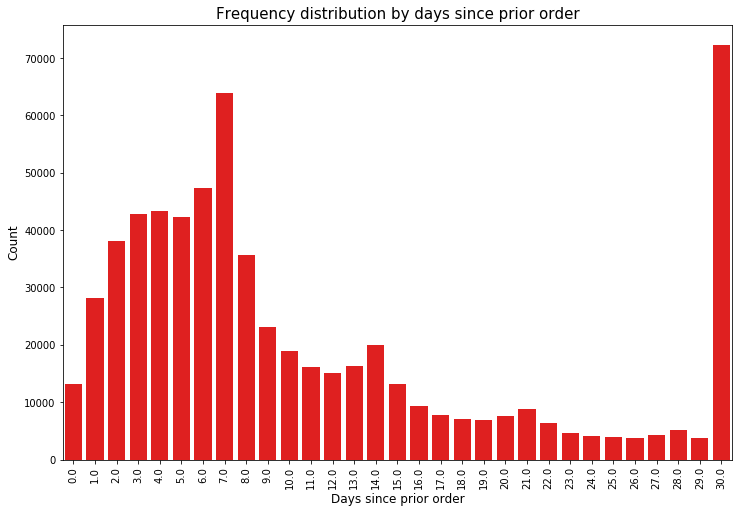

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color="red")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()


## We can interpret that people buy items in a monthly and weekly interval.

Most common user made: 1 purchases


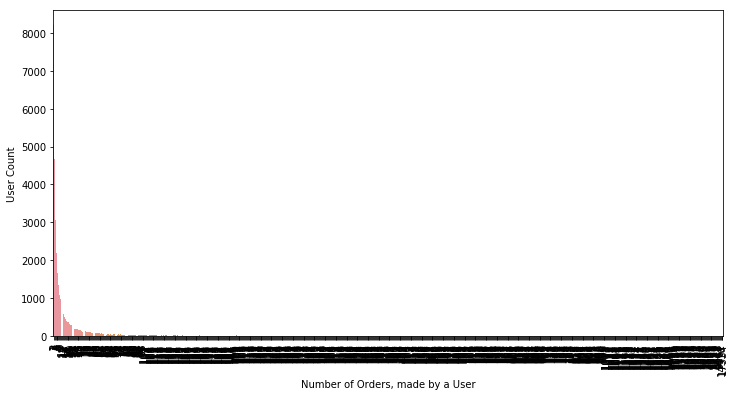

In [78]:
ocpu = order_products_prior_df.groupby('product_id')['order_id']\
.apply(lambda x: len(x.unique())).reset_index().groupby('order_id').aggregate("count")

print('Most common user made: {} purchases'.format(
    ocpu[ocpu.product_id == ocpu.product_id.max()].index.values[0]))

plt.figure(figsize=(12, 6))
sns.barplot(ocpu.index, ocpu.product_id)
plt.xticks(rotation='vertical')
plt.ylabel('User Count')
plt.xlabel('Number of Orders, made by a User')
pass

In [79]:
prior_order.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


In [80]:
grouped = prior_order.groupby("product_id")["reordered"].aggregate({'Total_reorders': 'count'}).reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,product_id,Total_reorders,product_name
18367,24852,17934,Banana
9651,13176,14516,Bag of Organic Bananas
15583,21137,9967,Organic Strawberries
16166,21903,9147,Organic Baby Spinach
34867,47209,8042,Organic Hass Avocado
35282,47766,6518,Organic Avocado
35180,47626,5721,Large Lemon
12354,16797,5342,Strawberries
19358,26209,5296,Limes
20660,27966,5129,Organic Raspberries


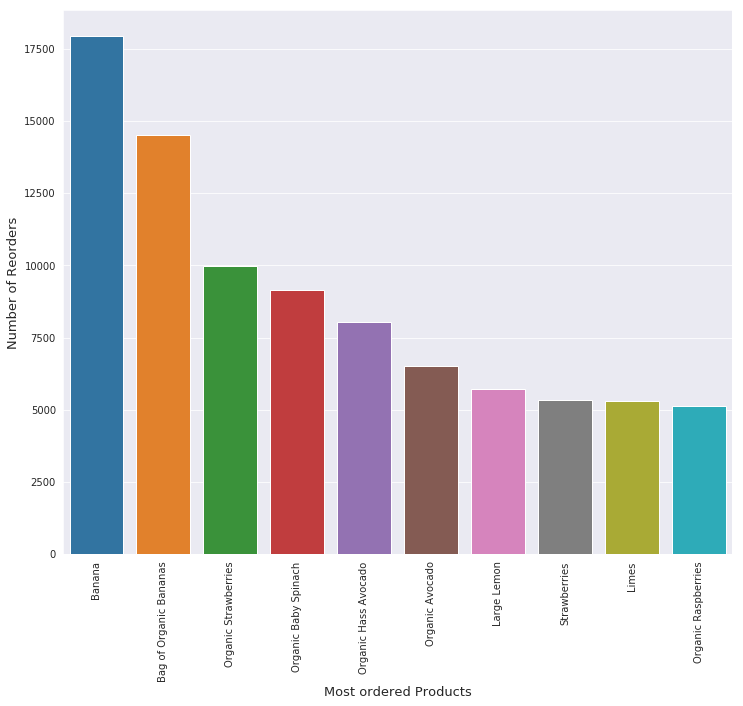

In [81]:
grouped  = grouped.groupby(['product_name']).sum()['Total_reorders'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

## Fruits like banana , strawberries are the most ordered products.